# Imports

In [1]:
import numpy as np 
import pandas as pd 
import os
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
import re
import pke
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure


%matplotlib notebook

# Read in dataset

In [2]:
papers = pd.read_csv('../Downloads/201812_CL_Github.csv')

In [3]:
papers.head(10)

,Abstract,Arxiv Link,Github Link,ID,Title
0,Discourse structures are beneficial for vari...,http://arxiv.org/abs/1812.00176,github.com/irit-melodi/irit-stac,1812.00176,A Deep Sequential Model for Discourse Parsing ...
1,Learning good representations is of crucial ...,http://arxiv.org/abs/1812.00271,github.com/mravanelli/SincNet/,1812.00271,Learning Speaker Representations with Mutual I...
2,The explosive growth in fake news and its er...,http://arxiv.org/abs/1812.00315,github.com/borisveytsman/acmart/issues/138,1812.00315,"Fake News: A Survey of Research, Detection Met..."
3,The amount of dialogue history to include in...,http://arxiv.org/abs/1812.00350,github.com/keras-team/keras,1812.00350,A Study on Dialogue Reward Prediction for Open...
4,Detecting controversy in general web pages i...,http://arxiv.org/abs/1812.00382,github.com/aboSamoor/polyglot,1812.00382,Improved and Robust Controversy Detection in G...
5,User representations are routinely used in r...,http://arxiv.org/abs/1812.00436,github.com/myleott/ark-twokenize-py,1812.00436,Learning Representations of Social Media Users
6,Reviewing radiology reports in emergency dep...,http://arxiv.org/abs/1812.00677,github.com/fchollet/keras,1812.00677,Clinical Document Classification Using Labeled...
7,This paper presents an end-to-end response s...,http://arxiv.org/abs/1812.00686,github.com/JasonForJoy/DSTC7-ResponseSelection,1812.00686,Building Sequential Inference Models for End-t...
8,The latency in the current neural based dial...,http://arxiv.org/abs/1812.00899,github.com/elnaaz/GCE-Model,1812.00899,Toward Scalable Neural Dialogue State Tracking...
9,A significant amount of information in today...,http://arxiv.org/abs/1812.00978,st,1812.00978,A Survey on Semantic Parsing


# Extract keywords and ranks

In [4]:
def keyword(caption, n):
    extract = pke.unsupervised.TextRank() 
    extract.load_document(caption)
    extract.candidate_selection()
    extract.candidate_weighting()
    keywords = extract.get_n_best(n=n, stemming=False)
    print(keywords,"\n")
    return(keywords)

In [5]:
papers['Abstract_Keyphrases'] = papers.apply(lambda row: (keyword(row['Abstract'],10)),axis=1)

[('discourse dependency structures', 0.12763643986541195), ('multi - party dialogues', 0.09987555605493133), ('various nlp tasks such', 0.09987521605493133), ('dependency relations', 0.08426673144984731), ('deep sequential model', 0.08243783233248833), ('discourse structures', 0.08168668348582872), ('elementary discourse units', 0.07397240776560306), ('edu sequence', 0.06500155861004538), ('concerned edus', 0.06500144861004536), ('previous edu', 0.06500088861004537)] 

[('useful speaker representations', 0.07616403221003648), ('semi - supervised settings', 0.07469870528478), ('different objective functions', 0.056024678963585005), ('raw speech waveform', 0.056023768963585005), ('generative adversarial networks', 0.05602324896358501), ('high dimensional spaces', 0.056022948963585006), ('speaker identification', 0.05381757670613808), ('speaker identities', 0.05381655670613808), ('architecture similar', 0.048488020933605804), ('negative samples', 0.04153517144297663)] 

[('current fake ne

[('directional recurrent networks such', 0.16393485603462404), ('art methods leverage', 0.15048354765114438), ('single backward pass', 0.13517503077316295), ('novel method', 0.10037148123511598), ('new state', 0.09157749750501491), ('current state', 0.09157668750501492), ('single feed', 0.08196819301731202), ('entire sequence', 0.08196811301731201), ('video summarization', 0.081968063017312), ('attention mechanism', 0.081967513017312)] 

[('sophisticated natural language processing', 0.08873268964357545), ('several language information sources', 0.08148234721348552), ('user activity logs', 0.06716357570495071), ('knowledge work support systems', 0.06509384200926115), ('explicit user input', 0.057610429122015624), ('german language', 0.05578252587654222), ('high speed methods', 0.05367627822610351), ('information extraction task', 0.05266188778239664), ('much runtime performance', 0.04882297900694586), ('first improvement step', 0.04882192900694587)] 

[('+36.2 mean reciprocal rank', 0.

[('pre - trained word embeddings', 0.12352378351891882), ('continuous embedding layer', 0.09750728643335953), ('softmax layer', 0.06664993371481821), ('novel probabilistic loss', 0.06389857357827479), ('large memory footprint', 0.06389830357827478), ('reference translations', 0.055407344854719376), ('translation quality', 0.05540685485471938), ('machine translation', 0.05540649485471938), ('slowest layer', 0.055390412296012825), ('final layer', 0.05539017229601283)] 

[('method outperforms conventional mle loss', 0.1314563747011156), ('neural machine translation tasks', 0.11454164726229933), ('non - smooth prediction', 0.10767408498798328), ('multi - class classification', 0.10767401498798328), ('english translation task', 0.09987698536935224), ('text summarization task show', 0.0925810833620284), ('non - smoothness', 0.09256218256483548), ('wise regularization method', 0.07968070430233239), ('target token', 0.06087935473554161), ('probabilities results', 0.05244684085779002)] 

[('con

[('conditional bert contextual augmentation', 0.20362689787889257), ('conditional masked language model', 0.19220096586882887), ('new conditional masked language', 0.16517561819656004), ('deep bidirectional language model', 0.1624223141174357), ('various different text classification tasks', 0.15923752871935332), ('masked language model', 0.13171858497481986), ('contextual augmentation augments', 0.13124084216921042), ('novel data augmentation method', 0.12428222494860494), ('conditional bert', 0.1220859504981655), ('unidirectional language model', 0.11886793548464561)] 

[('deep latent variable', 0.12878680753434316), ('latent variable models', 0.11375519173889187), ('posterior inference intractable', 0.0977099751872616), ('latent variable objectives', 0.09764444624659578), ('non - differentiability', 0.08875849644970416), ('powerful function approximators', 0.08875793644970414), ('variational inference', 0.07707615510825103), ('deep parameterizations', 0.06761036202119966), ('deep le

[('image captioning models', 0.09832285983027182), ('caption data', 0.09451625382721607), ('associated training data', 0.0868922200444906), ('training captions', 0.08392163788536147), ('open images image', 0.08115004324679674), ('truth object detections', 0.07843341081734065), ('object classes', 0.07576472004218722), ('training data', 0.07441871555177709), ('limited visual concepts', 0.06865000558352176), ('many more classes', 0.06754033891884387)] 

[('robust structural representations', 0.15648130524968143), ('rnn autoencoder representations', 0.1372819496739365), ('tensor product representations', 0.13457295996507063), ('continuous vector representations', 0.1258406891540222), ('sentence representation learning', 0.11251037631615662), ('sequence representations', 0.11170343064947251), ('vector representations', 0.11170226064947252), ('sensitive representations', 0.09974397727233786), ('tensor product decomposition networks', 0.09711952769383707), ('interpretable compositional struct

[('global anchor method recovers', 0.12222159627487433), ('global anchor method', 0.10379303645975081), ('disparate text corpora', 0.0843901956539987), ('graph laplacian technique', 0.08439002565399871), ('level language shifts', 0.0843888556539987), ('distributional tools such', 0.0843886356539987), ('active research area', 0.0843884356539987), ('alignment method', 0.0688399949647354), ('domain clustering', 0.06280454524494689), ('domain adaptation', 0.06280432524494689)] 

[('most current word embedding approaches', 0.20221486105935152), ('novel neighbor embedding method', 0.16164890266131993), ('word embedding approach', 0.13725563695050416), ('word embedding', 0.1155907276599817), ('machine learning tasks', 0.10791395906474763), ('natural language processing', 0.10791383906474762), ('various queries', 0.07194386604316505), ('experiment results', 0.07194365604316505), ('step random', 0.07194345604316504), ('input neighborhoods', 0.07194334604316505)] 

[('cross - lingual speech emot

[('peters et al .', 0.18491858132719172), ('pre - training', 0.1276597644680576), ('devlin et', 0.10419471774997562), ('art results', 0.08510736297870504), ('new state', 0.08510729297870505), ('model capacity', 0.08510722297870504), ('large part', 0.08510714297870504), ('outperforms elmo', 0.08510711297870505), ('additional languages', 0.08510662297870504), ('previous work', 0.08510642297870505)] 



In [6]:
titles = papers['Title']
count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(titles)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_titles = tfidf_vectorizer.transform(counts)

In [7]:
X = tfidf_titles
clustering = AffinityPropagation().fit(X)
content_affinity_clusters = list(clustering.labels_)
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_

In [8]:
papers['title_cluster'] = content_affinity_clusters

In [9]:
paper_clusters = papers.loc[:,['Title','Abstract_Keyphrases']]

# Number of clusters 

In [10]:
n_clusters_ = len(cluster_centers_indices)
n_clusters_

21

# Reduce sparse matrix

In [11]:
svd = TruncatedSVD(n_components=3)
X = svd.fit_transform(X) 

In [12]:
X.shape

(106, 3)

In [13]:
paper_clusters.shape

(106, 2)

# Set up data for plotting

In [21]:
paper_clusters["svd_1"] = X[:,0]
paper_clusters["svd_2"] = X[:,1]
paper_clusters["svd_3"] = X[:,2]

In [22]:
paper_clusters['labels'] = labels

In [23]:
paper_clusters

,Title,Abstract_Keyphrases,pca_1,pca_2,pca_3,labels,svd_1,svd_2,svd_3
0,A Deep Sequential Model for Discourse Parsing ...,"[(discourse dependency structures, 0.127636439...",0.277436,-0.048161,-0.209005,14,0.277436,-0.048161,-0.209005
1,Learning Speaker Representations with Mutual I...,"[(useful speaker representations, 0.0761640322...",0.257801,-0.062117,0.266058,1,0.257801,-0.062117,0.266058
2,"Fake News: A Survey of Research, Detection Met...","[(current fake news research, 0.16848911598677...",0.156438,-0.172702,-0.084272,0,0.156438,-0.172702,-0.084272
3,A Study on Dialogue Reward Prediction for Open...,"[(dialogue reward predictors, 0.15061766476375...",0.142040,-0.086060,-0.131593,10,0.142040,-0.086060,-0.131593
4,Improved and Robust Controversy Detection in G...,"[(cross - domain performance, 0.10272056776767...",0.135065,-0.034582,-0.075831,16,0.135065,-0.034582,-0.075831
...,...,...,...,...,...,...,...,...,...
101,A neural joint model for Vietnamese word segme...,"[(huang et al ., 0.17543913649112666), (vietna...",0.223947,-0.002200,-0.161018,6,0.223947,-0.002200,-0.161018
102,Variational Self-attention Model for Sentence ...,"[(multi - modal attention distributions, 0.222...",0.238181,0.181515,-0.223911,20,0.238181,0.181515,-0.223911
103,Cross-language Citation Recommendation via Hie...,[(cross - language citation recommendation tas...,0.216721,-0.234641,0.020635,17,0.216721,-0.234641,0.020635
104,"The meaning of ""most"" for visual question answ...","[(visual question answering model, 0.173924005...",0.259035,0.022438,-0.094367,4,0.259035,0.022438,-0.094367


# Cluster centres

In [24]:
cluster_centers_indices

array([  2,   5,  10,  20,  22,  28,  32,  37,  52,  53,  61,  62,  68,
        76,  78,  86,  87,  98,  99, 100, 102])

In [25]:
clusters = paper_clusters.iloc[cluster_centers_indices, :]

In [26]:
clusters

,Title,Abstract_Keyphrases,pca_1,pca_2,pca_3,labels,svd_1,svd_2,svd_3
2,"Fake News: A Survey of Research, Detection Met...","[(current fake news research, 0.16848911598677...",0.156438,-0.172702,-0.084272,0,0.156438,-0.172702,-0.084272
5,Learning Representations of Social Media Users,"[(distant user information, 0.0723296438901772...",0.206729,-0.247290,0.173243,1,0.206729,-0.247290,0.173243
10,e-SNLI: Natural Language Inference with Natura...,"[(stanford natural language inference, 0.12571...",0.235471,-0.136927,0.247959,2,0.235471,-0.136927,0.247959
20,Neural Abstractive Text Summarization with Seq...,"[(several different neural network components,...",0.299485,0.222353,0.400178,3,0.299485,0.222353,0.400178
22,Multi-Task Learning with Multi-View Attention ...,"[(novel multi - task learning scheme, 0.183063...",0.438033,0.170958,-0.072142,4,0.438033,0.170958,-0.072142
28,Dialogue Generation: From Imitation Learning t...,"[(adversarial dialogue generation models, 0.13...",0.277028,-0.165179,0.290902,5,0.277028,-0.165179,0.290902
32,On the Dimensionality of Word Embedding,"[(many empirical observations, 0.0974034774025...",0.200654,-0.330549,-0.148139,6,0.200654,-0.330549,-0.148139
37,A Multimodal LSTM for Predicting Listener Empa...,"[(concordance correlation coefficient, 0.10256...",0.073671,0.034862,-0.092547,7,0.073671,0.034862,-0.092547
52,Hateminers : Detecting Hate speech against Women,"[(english subtask a, 0.11948475768634531), (au...",0.029208,-0.047517,-0.055255,8,0.029208,-0.047517,-0.055255
53,Conditional BERT Contextual Augmentation,"[(conditional bert contextual augmentation, 0....",-0.000408,0.002974,0.005903,9,-0.000408,0.002974,0.005903


# Plot of related papers in 3D space through affinity propagation

### Centres of the affinity propagation are represented as large black dots
### Individual papers connected to a centre are represented by small coloured dots and a line to its associated centre

<IPython.core.display.Javascript object>


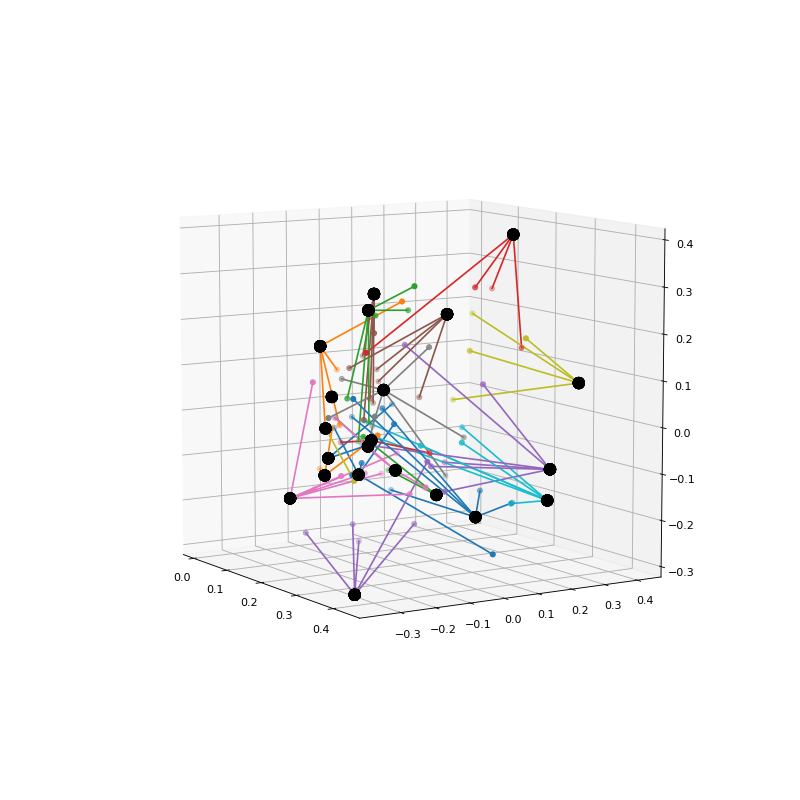

In [27]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

ax = plt.axes(projection='3d')

groups = paper_clusters.groupby("labels")


for i in range(len(cluster_centers_indices)):
    group = paper_clusters.loc[paper_clusters['labels'] == i]
    
    xdata = group["svd_1"]
    ydata = group["svd_2"]
    zdata = group["svd_3"]

    ax.scatter3D(xdata, ydata, zdata, color="C"+str(i))
    
#Mark the centers of the affinity propagation
for j in range(len(clusters)):
    xdata = clusters["svd_1"]
    ydata = clusters["svd_2"]
    zdata = clusters["svd_3"]

    ax.scatter3D(xdata, ydata, zdata, color="Black", s=100)
    
    
#Draw lines between centers and points 
for k in range(len(paper_clusters)):
    paper = paper_clusters.iloc[k,:]
    centre = clusters.iloc[paper['labels'],:]

    xdata = [paper["svd_1"]] + [centre["svd_1"]]
    ydata = [paper["svd_2"]] + [centre["svd_2"]]
    zdata = [paper["svd_3"]] + [centre["svd_3"]]

    ax.plot3D(xdata, ydata, zdata, c = "C"+ str(paper['labels']))
    